<a href="https://colab.research.google.com/github/fakhar-iqbal/Machine_Learning_Fundamentals/blob/main/Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Frequentist Statistics**

In [1]:
import numpy as np
import seaborn as sns
import scipy.stats as st
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)

##Measure of Central Tendency

In [3]:
x= st.skewnorm.rvs(10,size=1000)

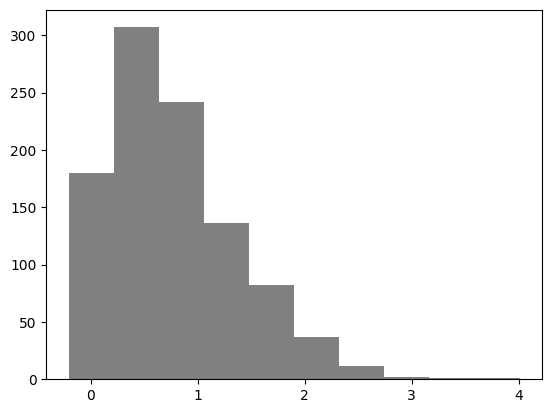

In [4]:
fig,ax = plt.subplots()
_ = ax.hist(x,color='grey')

In [5]:
xbar = x.mean()

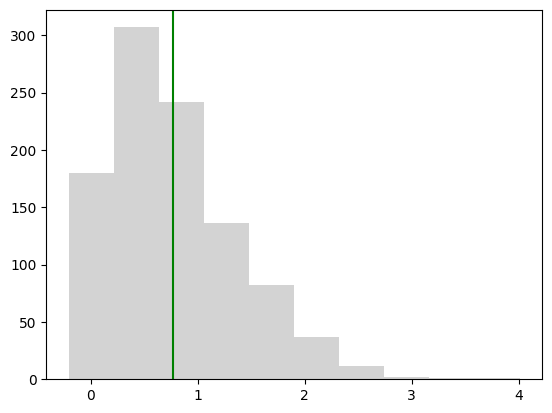

In [6]:
fig,ax = plt.subplots()
plt.axvline(xbar,color='green')
_ = ax.hist(x,color='lightgray')

In [7]:
med = np.median(x)

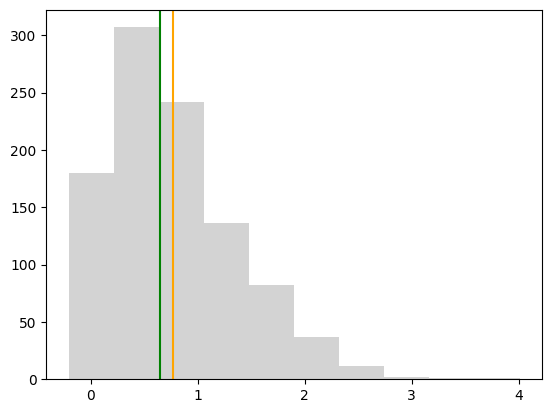

In [8]:
fig,ax = plt.subplots()
plt.axvline(med,color='green')
plt.axvline(xbar,color='orange')
_ = ax.hist(x,color='lightgray')

##Measure of Dispersion

In [9]:
vr = np.var(x)

In [10]:
sd = np.std(x)

In [11]:
sd

0.5960572059628305

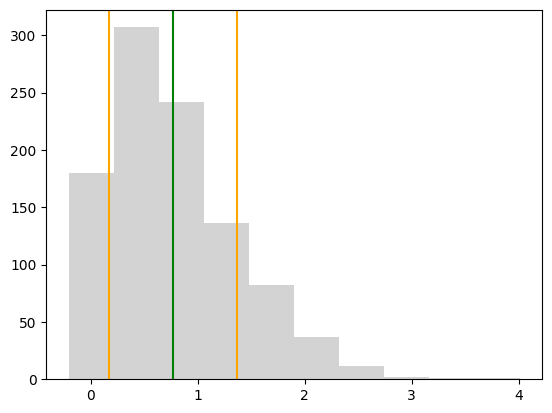

In [12]:
fig,ax = plt.subplots()
plt.axvline(xbar,color='green')
plt.axvline(xbar + sd,color='orange')
plt.axvline(xbar - sd,color='orange')
_ = ax.hist(x,color='lightgray')

##Standard Error

A further derivation of standard deviation is **standard error**, which is denoted with $\sigma_\bar{x}$:
$$ \sigma_\bar{x} = \frac{\sigma}{\sqrt{n}} $$

In [13]:
sd / ((x.size )**(1/2))

0.018848983865986414

In [14]:
st.sem(x,ddof=0)

0.018848983865986414

Standard error enables us to compare whether the means of two distributions differ *significantly*, a focus of *Intro to Stats*.

##Guassian Distribution / Normal Distribution

In [15]:
x = np.random.normal(size=10000)

In [16]:
sns.set_style('ticks')

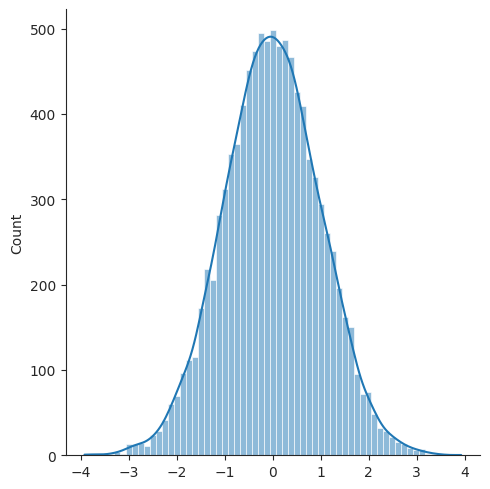

In [17]:
_ = sns.displot(x, kde=True)

In [18]:
x.std()

1.0039756140435032

##**Z-Scores**

Assuming normally-distributed data, a z-score indicates how many standard deviations away from the mean a data point (say, $x_i$) is:
$$ z = \frac{x_i-\mu}{\sigma} $$

That is, the formula *standardizes* a given score $x_i$ to the (standard normal) *z*-distribution. (As we covered in *Probability & Information Theory*, you could standardize any normal distribution to a mean of zero and standard deviation of one by subtracting its original mean and then dividing by its original standard deviation.)

For example, let's say you get 85% on a CS101 exam. Sounds like a pretty good score and you did extremely well relative to your peers if the mean was 60% with a standard deviation of 10%:

In [19]:
(85-60)/10

2.5

In [20]:
x_i = 85
mu = 60
sigma  =10

In [21]:
x = np.random.normal(mu,sigma,size=10000)

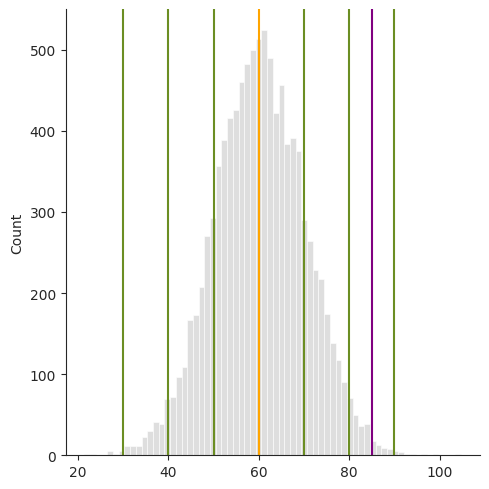

In [22]:
sns.displot(x,color='lightgray')

ax.set_xlim(0,100)
plt.axvline(mu, color='orange')
for v in [-3,-2,-1,1,2,3]:
    plt.axvline(mu+ v*sigma, color='olivedrab')

_ = plt.axvline(x_i,color='purple')

Your z-score is 2.5 standard deviations

In [23]:
## in the whole class

z = (x_i - np.mean(x))/np.std(x)
z

2.476625942263925

In [24]:
len((np.where(x>85)[0]))

54

In [25]:
100*54/10000

0.54

In [26]:
np.percentile(x,99)

83.3617286801891

In contrast, if the mean score is 90 and the std dev is 2

In [27]:
mu = 90
sigma = 2

In [28]:
y = np.random.normal(mu,sigma,size=10000)

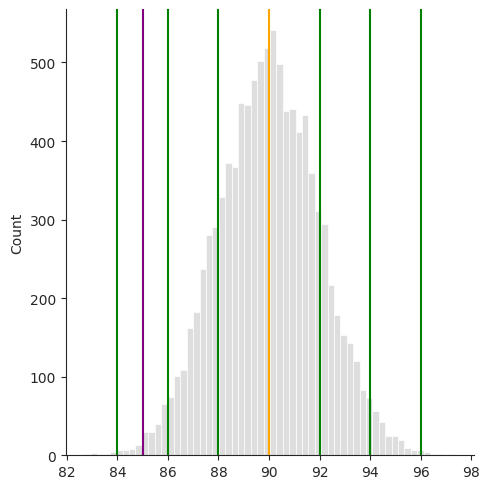

In [29]:
sns.displot(y,color='lightgray')
plt.axvline(mu, color='orange')

for v in [-3,-2,-1,1,2,3]:
  plt.axvline(mu + v*sigma,color='green')

_ = plt.axvline(x_i,color='purple')

In [30]:
z = (x_i - np.mean(y))/np.std(y)
z

-2.506180896352216

Now the z-score is 2.5 std dev below the mean

In [31]:
len(np.where(y>85)[0])

9948

In [32]:
100*9948/10000

99.48

In [33]:
np.percentile(y,1)

85.3959716097412

A frequentist convention is to consider a data point that lies further than three standard deviations from the mean to be an **outlier**.

It's a good idea to individually investigate outliers in your data as they may represent an erroneous data point (e.g., some data by accident, a data-entry error, or a failed experiment) that perhaps should be removed from further analysis (especially, as outliers can have an outsized impact on statistics including mean and correlation). It may even tip you off to a major issue with your data-collection methodology or your ML model that can be resolved or that you could have a unit test for.

#**p-value**

These quantify the *p*robability that a given observation would occur by chance alone.

For example, we saw above that with our simulated 10k exam results, only 69 folks attained a *z*-score above 2.5 and only 67 (=10000-9993) attained a *z*-score below -2.5. Thus, if we were to randomly sample one of the 10k CS101 exam results, we would expect it to be outside of 2.5 (i.e., +/- 2.5) standard deviations only 1.36% of the time:
$$ \frac{69+67}{10000} = 0.0136 = 1.36\% $$

Equivalent to increasing our CS101 class size from 10k toward infinity, the probability of a score being further than 2.5 standard deviations from the mean of a normal distribution can be determined with the distribution's *cumulative distribution function* (CDF):

In [34]:
p_below = st.norm.cdf(-2.5)

In [35]:
p_below

0.006209665325776132

In [66]:
mu = 75
sigma = 10
c =np.random.normal(mu,sigma,size=1000000)

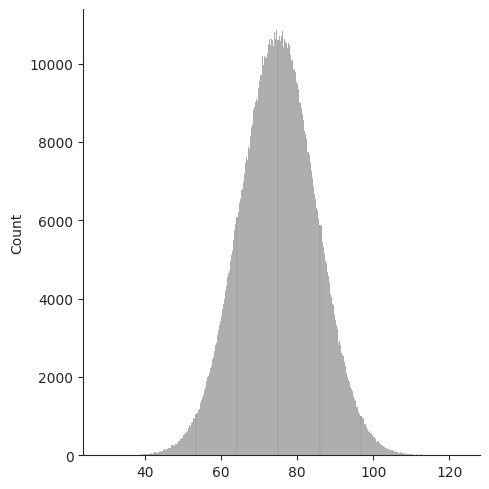

In [68]:
_=sns.displot(c,color='gray')

In [69]:
len(np.where(c>80)[0])

308126

In [70]:
308126*100/1000000

30.8126

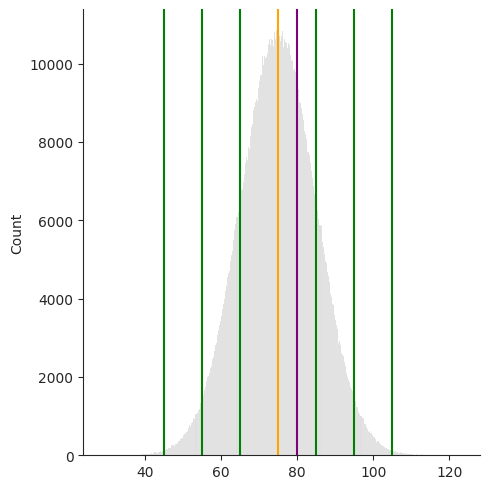

In [71]:
sns.displot(c,color='lightgray')
plt.axvline(mu, color='orange')

for v in [-3,-2,-1,1,2,3]:
  plt.axvline(mu + v*sigma,color='green')

_ = plt.axvline(x=80,color='purple')

In [72]:
zs  = (80 - np.mean(c))/np.std(c)
zs

0.4997811011356299

In [73]:
pb = st.norm.cdf(-0.5)

In [82]:
pu = 1 - st.norm.cdf(0.5)

In [83]:
pu * 1000000   #### these are above the z score of 0.5

308537.5387259869

In [78]:
pb * 1000000    ### they are the number of people under z-score of 0.5 in a infinite number of class

308537.5387259869

In [84]:
(308537 + 308537)/1000000

0.617074

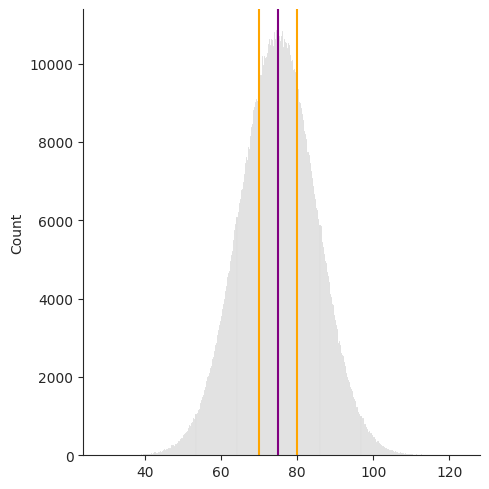

In [85]:
sns.displot(c,color='lightgray')

plt.axvline(mu + 0.5 * sigma,color='orange')
plt.axvline(mu,color='purple')
_ = plt.axvline(mu - 0.5*sigma,color='orange')

In [86]:
### probability to have any score to be out or below the 0.5 times std dev above or below the means is

p_outside = pu + pb
p_outside

0.6170750774519738

In [87]:
p_outside * 1000000  ## number of values outside the z-score std dev


617075.0774519738

In other words, assuming a normal distribution, the probability (the *p*-value) of a sampled value being at least 0.5 standard deviations away from the mean by chance alone is $p \approx 0.617$.

The frequentist convention is that if a *p*-value is less than .05, we can say that it is a "statistically significant" observation. We typically denote this significance threshold with $\alpha$, e.g., $\alpha = .05$.

For example, with a fair coin, the probability of throwing six heads *or* six tails in a six-coin-flip experiment is 0.03125 ($p = 0.015625$ for *either of* six heads or six tails). Refer back to the `coinflip_prob()` method from the [*Probability* notebook](https://github.com/jonkrohn/ML-foundations/blob/master/notebooks/5-probability.ipynb) for proof.

If a friend of yours hands you a coin, the **null hypothesis** (the baseline assumed by the fair-toss distribution) would be that the coin is fair. If you test this coin by flipping it six times and it comes up heads on all six or tails on all six, this observation would suggest that you should *reject the null hypothesis* because chance alone would facilitate such an observation less than 5% of the time, i.e., $p < .05$.

The z-scores correspinding to a= 0.05 can be obtained from the normal distribution's `percent point function, ppf`, which facilitates the inverse of cdf. to capture 95 % of values around the mean, we leave 2.5% at the bottom of teh distribution and 2.5% at the top:

In [90]:
st.norm.ppf(0.025)

-1.9599639845400545

In [91]:
st.norm.ppf(1-0.025)

1.959963984540054

Thus, at the traditional a = 0.05, a sampled value with z-score less than -1.96 or greater than 1.96 would be considered statisticallty significant.

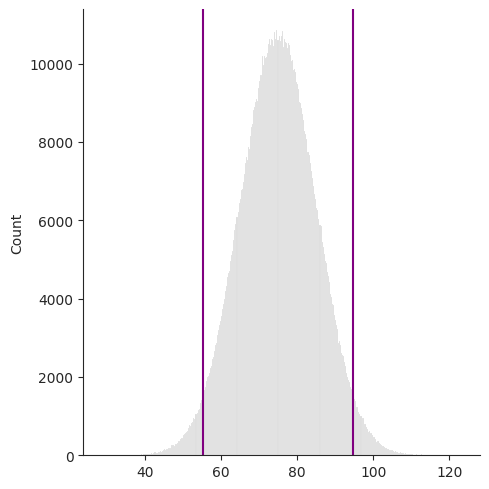

In [92]:
sns.displot(c,color='lightgray')

plt.axvline(mu - 1.96 * sigma, color='purple')
_ = plt.axvline(mu + 1.96 * sigma, color='purple')